# Neural Networks for Classification, and Clustering

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain why you have change it.

In [3]:
ID = 2056755
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]

X, y = load_fashion_mnist("C:/Users/Piermarco/Documents/GitHub/Machine-Learning/ML2021_HW2_and_3/data/data", kind='train')
# rescale the data
X = X / 255.0 

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [44 46 57 74 48 39 52 49 33 58]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


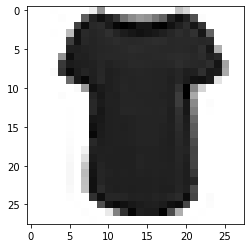

LABEL: 0
INPUT:


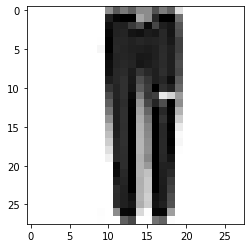

LABEL: 1
INPUT:


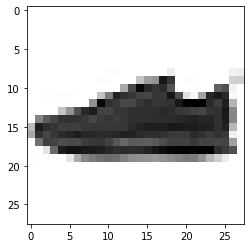

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [22]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#these are examples of possible architectures you can test, but feel free to use different architectures! 
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,), (100,100,), (100,)]}
MLP = MLPClassifier(max_iter = 300, alpha = 1e-4, solver = 'sgd', tol = 1e-4, learning_rate_init =.1)
mlp_cv = GridSearchCV(MLP, hl_parameters, cv = 5).fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
print(mlp_cv.best_params_)
print("Score with best parameters:")
print(mlp_cv.best_score_)
print("All scores on the grid:")
print(mlp_cv.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100,)}
Score with best parameters:
0.8525
All scores on the grid:
[0.8008 0.8384 0.7961 0.8444 0.8488 0.8525]


In [9]:
pd.DataFrame(mlp_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.854946,0.501258,0.004716,0.006943,"(10,)","{'hidden_layer_sizes': (10,)}",0.56,0.72,0.68,0.68,0.70,0.668,0.056000,5
1,1.367654,0.440510,0.001796,0.000399,"(50,)","{'hidden_layer_sizes': (50,)}",0.80,0.72,0.73,0.79,0.73,0.754,0.033823,2
2,0.422915,0.063446,0.001797,0.000400,"(10, 10)","{'hidden_layer_sizes': (10, 10)}",0.68,0.73,0.35,0.47,0.22,0.490,0.193184,6
3,0.885590,0.282208,0.001396,0.000489,"(50, 50)","{'hidden_layer_sizes': (50, 50)}",0.70,0.55,0.72,0.78,0.72,0.694,0.076837,4
4,1.549763,0.481258,0.002994,0.000629,"(100, 100)","{'hidden_layer_sizes': (100, 100)}",0.80,0.71,0.77,0.78,0.66,0.744,0.051614,3
5,1.883788,0.216928,0.001796,0.000399,"(100,)","{'hidden_layer_sizes': (100,)}",0.81,0.73,0.69,0.82,0.75,0.760,0.048990,1


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

On the pandas data frame extract from it's possible to see how the performance for a few hidden layers like (10,10,) or (10,) is going pretty bad but if we increased it's possible to see a good improvement of the NNs, this is caused by the low number of the neuron. But looking at data it's is easy to see how important is the number of neurons on the first hidden layer by choosing (100,) (50,), I got the best mean score on all over the K-fold test. 
Furthermore, I decided to add one more hidden layer of the same size as the first one, I expected a slight improvement of the neural network, but this doesn't happen. So, looking at the data I can figure out that the performance with (100,100,) and (50,50,) went down pretty heavily on the layer with 50 neurons and slightly on the layer with 100 neurons. Probably for this problem add new hidden layers doesn't lead the NNs to learn better features to classify the clothes and the number of samples is too low to use larger NNs.




## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [11]:
#get training and test error for the best NN model from CV
print(mlp_cv.best_params_)
mlp = MLPClassifier(hidden_layer_sizes = (100,), max_iter = 300, alpha = 1e-4, solver = 'sgd', tol = 1e-4, learning_rate_init =.1, verbose = True)
mlp.fit(X_train, y_train)

training_error = 1 - mlp.score(X_train, y_train)
test_error = 1 - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

{'hidden_layer_sizes': (100,)}
Iteration 1, loss = 2.30018365
Iteration 2, loss = 1.39003249
Iteration 3, loss = 1.30866972
Iteration 4, loss = 1.60606174
Iteration 5, loss = 0.90757800
Iteration 6, loss = 0.75832449
Iteration 7, loss = 0.66623319
Iteration 8, loss = 0.60253924
Iteration 9, loss = 0.54741105
Iteration 10, loss = 0.56389476
Iteration 11, loss = 0.48056359
Iteration 12, loss = 0.49921179
Iteration 13, loss = 0.42300555
Iteration 14, loss = 0.35429311
Iteration 15, loss = 0.35160511
Iteration 16, loss = 0.41606992
Iteration 17, loss = 0.39537744
Iteration 18, loss = 0.29538964
Iteration 19, loss = 0.24930470
Iteration 20, loss = 0.23740717
Iteration 21, loss = 0.21815670
Iteration 22, loss = 0.21583266
Iteration 23, loss = 0.23651173
Iteration 24, loss = 0.18653468
Iteration 25, loss = 0.19999841
Iteration 26, loss = 0.17022439
Iteration 27, loss = 0.18324141
Iteration 28, loss = 0.16757249
Iteration 29, loss = 0.13185116
Iteration 30, loss = 0.11540122
Iteration 31, loss

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [12]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000,  949,  999, 1034,  974, 1041,  978, 1049, 1019,  957],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [17]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(50,), (50,50,), (50,50,50,), (100,), (100,100,), (100,100,100), (150,)]}
MLP = MLPClassifier(max_iter = 300, alpha = 1e-4, solver = 'sgd', tol = 1e-4, learning_rate_init =.1, verbose = False)
mlp_large_cv = GridSearchCV(MLP,hl_parameters, cv = 5).fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
print(mlp_large_cv.best_params_)
print("Score with best parameters:")
print(mlp_large_cv.best_score_)
print("All scores on the grid:")
print(mlp_large_cv.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (150,)}
Score with best parameters:
0.8533000000000002
All scores on the grid:
[0.8345 0.841  0.8442 0.8476 0.8443 0.8445 0.8533]


In [18]:
pd.DataFrame(mlp_large_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.003477,2.764803,0.007378,0.001009,"(50,)","{'hidden_layer_sizes': (50,)}",0.8255,0.8295,0.8350,0.8430,0.8395,0.8345,0.006380,7
1,9.772814,2.619524,0.008776,0.000746,"(50, 50)","{'hidden_layer_sizes': (50, 50)}",0.8395,0.8390,0.8400,0.8385,0.8480,0.8410,0.003536,6
2,11.369831,1.827449,0.009375,0.000489,"(50, 50, 50)","{'hidden_layer_sizes': (50, 50, 50)}",0.8365,0.8355,0.8485,0.8475,0.8530,0.8442,0.006954,5
3,16.067303,2.198644,0.010172,0.000746,"(100,)","{'hidden_layer_sizes': (100,)}",0.8515,0.8455,0.8450,0.8530,0.8430,0.8476,0.003917,2
4,15.414807,2.129146,0.013861,0.001114,"(100, 100)","{'hidden_layer_sizes': (100, 100)}",0.8425,0.8345,0.8420,0.8530,0.8495,0.8443,0.006439,4
5,20.638911,5.773161,0.020743,0.004519,"(100, 100, 100)","{'hidden_layer_sizes': (100, 100, 100)}",0.8340,0.8390,0.8420,0.8585,0.8490,0.8445,0.008521,3
6,33.191749,1.468470,0.016755,0.001465,"(150,)","{'hidden_layer_sizes': (150,)}",0.8480,0.8470,0.8515,0.8665,0.8535,0.8533,0.007004,1


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

I decided first of all to discard the NN with (10,) (10,10) hidden layers for sure on a larger sample size the NN ones have worse results than the others.
So I keep the same as before and add three new ones with (50, 50, 50) and (100, 100, 100) and (150,).
In this case the results of the NNs are quite similar for each subdivision, and looking at the average scores I can see the importance, as before, of the number of neurons on the layer instead of the numbers of the hidden layers. Also, the double number of samples helps a lot looking at the NN mean_score with (50,0), in the test with 500 samples it gets 0,754, and in case, with 1000 samples it gets 0,8345 a huge improvement of 0,08 (I can repeat for all the other NNs this simple analysis). Hence, data also plays an important role.
But as I expected, the best mean_score is achieved by the NN with the largest number of neurons on the hidden layer.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [20]:
#get training and test error for the best NN model from CV

best_mlp_large = MLPClassifier(hidden_layer_sizes = (150,), max_iter = 300, alpha = 1e-4, solver = 'sgd', tol = 1e-4, learning_rate_init =.1)
best_mlp_large.fit(X_train, y_train)

training_error = 1 - best_mlp_large.score(X_train, y_train)
test_error = 1 - best_mlp_large.score(X_test, y_test)

print ('RESULTS FOR BEST NN\n')
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.135140


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

I'm comparing the NN with 500 samples with hidden level (100,) and the other with 1000 samples with hidden level (150,).
Now, looking at the results I have that the training error goes to 0 in both cases, and this is normal. But looking at the test error, the NN evaluated on the 500 samples gets a score of 0.22 on the test error and the NN evaluated on the 1000 samples gets 0.13 with a difference of 0.09. this is pretty big in terms of the NN's performance.
This leads to the conclusion that the number of samples is really important.
I could try to use a huge number of neurons but for sure I can't get much better results than what I have already achieved.


## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


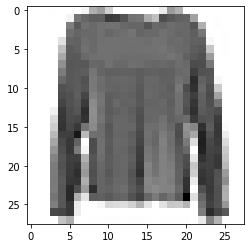

LABEL: 6


In [15]:
for i in range(len(y_test)):
    if best_mlp_large.predict(X_test)[i] == y_test[i]:
        if mlp.predict(X_test)[i] != y_test[i]:
            plot_input(X_test,y_test,i)
            break

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


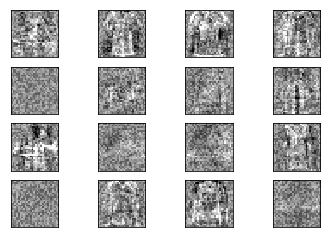

Weights with 10000 data points:


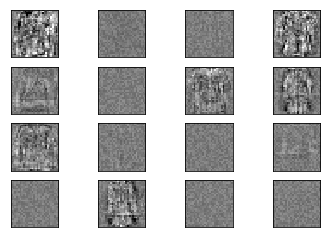

In [16]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

It seems that the weights of the NN evaluated on 500 are noisier, but on the other part, the weights evaluated on 1000 samples seem denser, more detailed and probably capture better features to distinguish the clothes.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

In [25]:
m_training = 10000
X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

param = {'kernel': ['linear', 'rbf'],
         'max_iter': [1000]}
SVM = GridSearchCV(SVC(), param , cv = 5).fit(X_train, y_train)

C:\Users\Piermarco\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Piermarco\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Piermarco\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Piermarco\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  war

In [26]:
pd.DataFrame(SVM.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.852335,0.201252,2.431329,0.367385,linear,1000,"{'kernel': 'linear', 'max_iter': 1000}",0.8055,0.813,0.8240,0.8065,0.7720,0.8042,0.017397,2
1,5.888369,0.351034,4.878483,0.148646,rbf,1000,"{'kernel': 'rbf', 'max_iter': 1000}",0.8680,0.872,0.8485,0.8730,0.8555,0.8634,0.009713,1


In [33]:
print(SVM.best_params_)
SVC_f = SVC(kernel = 'rbf', max_iter = 1000).fit(X_train, y_train)

training_error_other = 1 - SVC_f.score(X_train,y_train)
test_error_other = 1 - SVC_f.score(X_test, y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')
print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

{'kernel': 'rbf', 'max_iter': 1000}


C:\Users\Piermarco\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.098300
Best test error (other model): 0.136800


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

[ADD YOUR ANSWER HERE]
Comparing the result of the 2 classifier they have almost the same test score around 0.13, so if i had to chose from the two model there isn't any difference. But if I have to chose in terms of best classifier It's for sure the NN because I evaluated the SVM on 10000 samples and I got 0.13 of test error, If I will evaluate my NN with 10000 samples I will get for sure a better test score of 0.13.
So in this task the NN perform better then the SVM.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [34]:
#load the required packages
from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [35]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [36]:
kmeans = KMeans(n_clusters = 10, n_init = 10, random_state= ID)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=2056755)

## Comparison of clusters with true labels

## TO DO 2
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [37]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
prediction = kmeans.predict(X_train)
print(sklearn.metrics.cluster.contingency_matrix(y_train, prediction))
#The row indicate that there are 10 samples whose true cluster is in "0". Of them 6 samples in 0, 1 samples in 1 ecc

[[ 12 103   4  66   6   1   0   0   0   1]
 [  5   5 175   4   2   0   0   0   0   1]
 [ 12   5   0  59 133   3   0   0   0   0]
 [ 16  49 113  21   4   0   0   0   0   0]
 [ 10  26   5  37 127   2   0   0   0   0]
 [134   0   0   0   0   0  15  12  47   0]
 [ 15  29   0  84  63   1   0   0   0   1]
 [ 23   0   0   0   0   0  25   1 155   0]
 [ 14   1   0   8   5  76   6   0   7  76]
 [  4   0   0   1   0   0  85  99   5   1]]


## TO DO 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

For this problem the clustering does not seem to work very well I expect the highest values to be arranged along the diagonal, where they are correctly labeled.
However, from the matrix it can be seen how the data follows the diagonal of the matrix but many examples are miss labeled.


## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [44]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

for i in range(2,16):
    kmeans = KMeans(n_clusters = i, n_init = 10, random_state= ID).fit(X_train, y_train)
    silhouttescore = sklearn.metrics.silhouette_score(X_train, kmeans.labels_, metric='euclidean')
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19265739147474187
Silhoutte coefficient for number of clusters=3: 0.18431172488176648
Silhoutte coefficient for number of clusters=4: 0.18064209058718655
Silhoutte coefficient for number of clusters=5: 0.15981174520542404
Silhoutte coefficient for number of clusters=6: 0.1592124998578591
Silhoutte coefficient for number of clusters=7: 0.16957584893142064
Silhoutte coefficient for number of clusters=8: 0.157700363928842
Silhoutte coefficient for number of clusters=9: 0.15529656154096597
Silhoutte coefficient for number of clusters=10: 0.15446349484013988
Silhoutte coefficient for number of clusters=11: 0.1407572543194251
Silhoutte coefficient for number of clusters=12: 0.13716247441404142
Silhoutte coefficient for number of clusters=13: 0.1346273101527629
Silhoutte coefficient for number of clusters=14: 0.1327401127291011
Silhoutte coefficient for number of clusters=15: 0.1207599738303772


## TO DO 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

[ADD YOUR ANSWER HERE]